In [2]:
import numpy as np
import pandas as pd

In [49]:
path = 'data/enhanced_anxiety_dataset.csv'
df = pd.read_csv(path)

In [50]:
features = df.columns[:-1]
target = df.columns[-1]
print(f'features size:', {features.shape})

features size: {(18,)}


In [51]:
df['Anxiety Level (1-10)'].value_counts()

Anxiety Level (1-10)
4.0     2416
3.0     2407
2.0     1756
5.0     1629
1.0     1039
6.0      616
8.0      363
9.0      329
10.0     322
7.0      123
Name: count, dtype: int64

In [52]:
df['Anxiety Level (1-10)'] = np.where(df['Anxiety Level (1-10)'] > 5, 1, 0)

In [54]:
df['Anxiety Level (1-10)'].value_counts()

Anxiety Level (1-10)
0    9247
1    1753
Name: count, dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

In [56]:
df['Smoking'].value_counts()
df['Family History of Anxiety'].value_counts()
df['Dizziness'].value_counts()
df['Medication'].value_counts()
df['Recent Major Life Event'].value_counts()

Recent Major Life Event
Yes    5623
No     5377
Name: count, dtype: int64

In [57]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Smoking'] = encoder.fit_transform(df['Smoking'])
df['Family History of Anxiety'] = encoder.fit_transform(df['Family History of Anxiety'])
df['Dizziness'] = encoder.fit_transform(df['Dizziness'])
df['Medication'] = encoder.fit_transform(df['Medication'])
df['Recent Major Life Event'] = encoder.fit_transform(df['Recent Major Life Event'])


In [59]:
df.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,0,Artist,6.0,2.7,181,10,1,0,10,114,14,4,0,1,3,1,7,0
1,46,2,Nurse,6.2,5.7,200,8,1,1,1,62,23,2,1,0,2,0,8,0
2,64,1,Other,5.0,3.7,117,4,0,1,1,91,28,3,0,0,1,1,1,0
3,20,0,Scientist,5.8,2.8,360,6,1,0,4,86,17,3,0,0,0,0,1,0
4,49,0,Other,8.2,2.3,247,4,1,0,1,98,19,4,1,1,1,0,3,0


In [60]:
df['Occupation'].value_counts()

Occupation
Musician      892
Artist        888
Student       878
Nurse         861
Chef          858
Doctor        842
Other         840
Freelancer    838
Engineer      833
Scientist     832
Athlete       822
Lawyer        809
Teacher       807
Name: count, dtype: int64

In [61]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Musician', 'Artist', 'Student', 'Nurse', 'Chef', 'Doctor', 'Other', 'Freelancer', 'Engineer', 'Scientist', 'Athlete', 'Lawyer', 'Teacher']])
df['Occupation'] = encoder.fit_transform(df[['Occupation']])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  int64  
 2   Occupation                         11000 non-null  float64
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  int64  
 8   Family History of Anxiety          11000 non-null  int64  
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

In [63]:

X = np.array(df[features])
X

array([[29.,  0.,  1., ...,  3.,  1.,  7.],
       [46.,  2.,  3., ...,  2.,  0.,  8.],
       [64.,  1.,  6., ...,  1.,  1.,  1.],
       ...,
       [29.,  1.,  3., ...,  2.,  1.,  7.],
       [53.,  2.,  1., ...,  1.,  1.,  2.],
       [56.,  2., 12., ...,  2.,  1.,  8.]], shape=(11000, 18))

In [64]:
y = np.array(df[target])
y

array([0, 0, 0, ..., 0, 0, 0], shape=(11000,))

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [66]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
X_train

array([[-0.01908239, -1.21623038,  1.63671944, ...,  0.72372656,
        -1.02345686,  0.28290424],
       [-0.77210924, -1.21623038,  1.36961392, ...,  1.63990203,
         0.97708076, -0.75326002],
       [-0.69680655,  0.0086297 , -0.76723026, ...,  0.72372656,
         0.97708076, -1.44403619],
       ...,
       [-0.32029313, -1.21623038, -1.56854683, ..., -0.1924489 ,
         0.97708076,  0.62829233],
       [ 0.43273373,  1.23348977,  0.30119183, ..., -1.10862437,
        -1.02345686,  1.3190685 ],
       [-1.29922803,  0.0086297 , -0.23301922, ..., -0.65053664,
        -1.02345686,  0.97368041]], shape=(8800, 18))

In [68]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [69]:
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    cost = -1/m * np.sum(y*np.log(h + 1e-8) + (1-y)*np.log(1 - h + 1e-8))
    return cost

In [70]:
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = sigmoid(np.dot(X, weights))
        gradient = (1/m) * np.dot(X.T, (h - y))
        weights -= learning_rate * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)
    return weights, cost_history

In [71]:
n_features = X_train.shape[1]
weights = np.zeros(n_features)

learning_rate = 0.01
iterations = 2000

weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, iterations)

# --- 4. Evaluate Model ---
# Predictions
y_pred_prob = sigmoid(np.dot(X_test, weights))
y_pred = (y_pred_prob >= 0.5).astype(int)

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\nLogistic Regression (from scratch) Evaluation:")
print("-----------------------------------------------")
print("Accuracy:", round(accuracy, 4))
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Logistic Regression (from scratch) Evaluation:
-----------------------------------------------
Accuracy: 0.7223

Confusion Matrix:
 [[1260  584]
 [  27  329]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.68      0.80      1844
           1       0.36      0.92      0.52       356

    accuracy                           0.72      2200
   macro avg       0.67      0.80      0.66      2200
weighted avg       0.88      0.72      0.76      2200



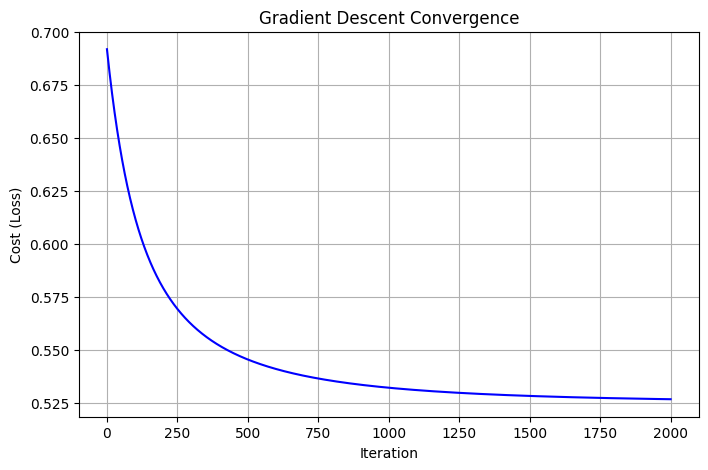

In [73]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,5))
plt.plot(cost_history, color='blue')
plt.title("Gradient Descent Convergence")
plt.xlabel("Iteration")
plt.ylabel("Cost (Loss)")
plt.grid(True)
plt.show()

In [112]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


In [113]:
y_pred = nb_model.predict(X_test)


In [114]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [115]:
print("\nModel Evaluation:")
print("-----------------")
print("Accuracy:", round(accuracy, 4))
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Evaluation:
-----------------
Accuracy: 0.9295

Confusion Matrix:
 [[1800   44]
 [ 111  245]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1844
           1       0.85      0.69      0.76       356

    accuracy                           0.93      2200
   macro avg       0.89      0.83      0.86      2200
weighted avg       0.93      0.93      0.93      2200

